`Import Library`

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`Import Data`

In [7]:
data = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/salarydataset/Salary Dataset.csv')
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


*Mengetahui Isi Data / Data Knowledge*

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [9]:
col = ['Location','Job Title']

for i in col:
  print(data[i].unique())

['Bangalore' 'Pune' 'Hyderabad' 'New Delhi' 'Mumbai']
['Data Scientist' 'Data Science Associate' 'Data Science Consultant'
 'Data Science' 'Senior Data Scientist' 'Junior Data Scientist'
 'Lead Data Scientist' 'Data Science Manager' 'Data Scientist - Trainee'
 'Data Science Lead' 'Data Analyst' 'Data Engineer'
 'Machine Learning Engineer' 'Machine Learning Software Engineer'
 'Software Engineer - Machine Learning'
 'Machine Learning Engineer/Data Scientist' 'Machine Learning Consultant'
 'Machine Learning Data Associate' 'Machine Learning Data Associate I'
 'Machine Learning Associate' 'Machine Learning Data Associate II'
 'Associate Machine Learning Engineer' 'Machine Learning Data Analyst'
 'Senior Machine Learning Engineer' 'Machine Learning Scientist'
 'Machine Learning Developer']


#Data Cleaning

*Deteksi MissingValue*

In [10]:
data.isna().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

`menghapus missing value`

In [11]:
data = data.dropna()
data.isna().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

*Data Preparation*

In [12]:
data[['Gaji','jangkawaktu']] = data['Salary'].str.split('/',n=1,expand=True) #langkah menjadikan satuan gaji yang sama
data['jangkawaktu'].value_counts()

yr    3229
mo    1088
hr      22
Name: jangkawaktu, dtype: int64

In [13]:
data["matauang_gaji"] = data["Salary"].apply(lambda x: x[0])
data["matauang_gaji"].value_counts()

₹    4313
$      19
£       6
A       1
Name: matauang_gaji, dtype: int64

In [14]:
data[data.Salary.str.contains('A')]

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr","AFN 1,56,179",yr,A


In [15]:
data['Salary'] = data['Salary'].str.replace('AFN','A')

In [16]:
data["Gaji"] = data["Salary"].apply(lambda x: int(x[1:x.find("/")].replace(",", "")))
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹


`jangka waktu diubah dalam satuan tahun`

In [17]:
def gaji_satuantahun(x):
    if x.jangkawaktu == "hr":
        return x.Gaji * 365
    elif x.jangkawaktu == "mo":
        return x.Gaji * 12
    else:
        return x.Gaji

In [18]:
data['Gaji_2'] = data.apply(gaji_satuantahun,axis=1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji,Gaji_2
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹,648573
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹,1191950
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹,836874
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹,669578
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹,944110


`mata uang diubah dalam satuan rupiah`

In [19]:
def gaji_rupiah(x):
    if x.matauang_gaji == "₹":
        return round(x.Gaji_2 * 189.64)
    elif x.matauang_gaji == "$":
        return round(x.Gaji_2 * 14344.75)
    elif x.matauang_gaji == "£":
        return round(x.Gaji_2 * 19463.27)
    else:
        return round(x.Gaji_2 * 155.20)

In [20]:
data['Gaji(Rp)_pertahun'] = data.apply(gaji_rupiah,axis = 1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji,Gaji_2,Gaji(Rp)_pertahun
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹,648573,122995384
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹,1191950,226041398
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹,836874,158704785
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹,669578,126978772
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹,944110,179041020


In [21]:
data = data.drop(data.columns[[4,5,6,7,8]],axis=1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Gaji(Rp)_pertahun
0,Mu Sigma,Data Scientist,105.0,Bangalore,122995384
1,IBM,Data Scientist,95.0,Bangalore,226041398
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,158704785
3,Impact Analytics,Data Scientist,40.0,Bangalore,126978772
4,Accenture,Data Scientist,32.0,Bangalore,179041020


#EDA

In [22]:
data.describe(include="object")

,Company Name,Job Title,Location
count,4339,4339,4339
unique,2528,25,5
top,Tata Consultancy Services,Data Scientist,Bangalore
freq,41,1844,1584


In [23]:
data.describe()

,Salaries Reported,Gaji(Rp)_pertahun
count,4339.000000,4.339000e+03
mean,2.777138,2.130567e+08
std,5.148095,8.381309e+08
min,1.000000,2.050767e+06
25%,1.000000,7.956346e+07
50%,1.000000,1.338511e+08
75%,3.000000,2.267709e+08
max,105.000000,3.259712e+10


In [24]:
#replace value dalam variabel

data['Job Title'] = data['Job Title'].apply(lambda col: 'Data Scientist' if col == 'Data Science' else col)
data['Job Title'] = data['Job Title'].apply(lambda col: 'Junior Data Scientist' if col == 'Data Scientist - Trainee' else col)

(array([0.e+00, 2.e+08, 4.e+08, 6.e+08, 8.e+08, 1.e+09]),
 <a list of 6 Text major ticklabel objects>)

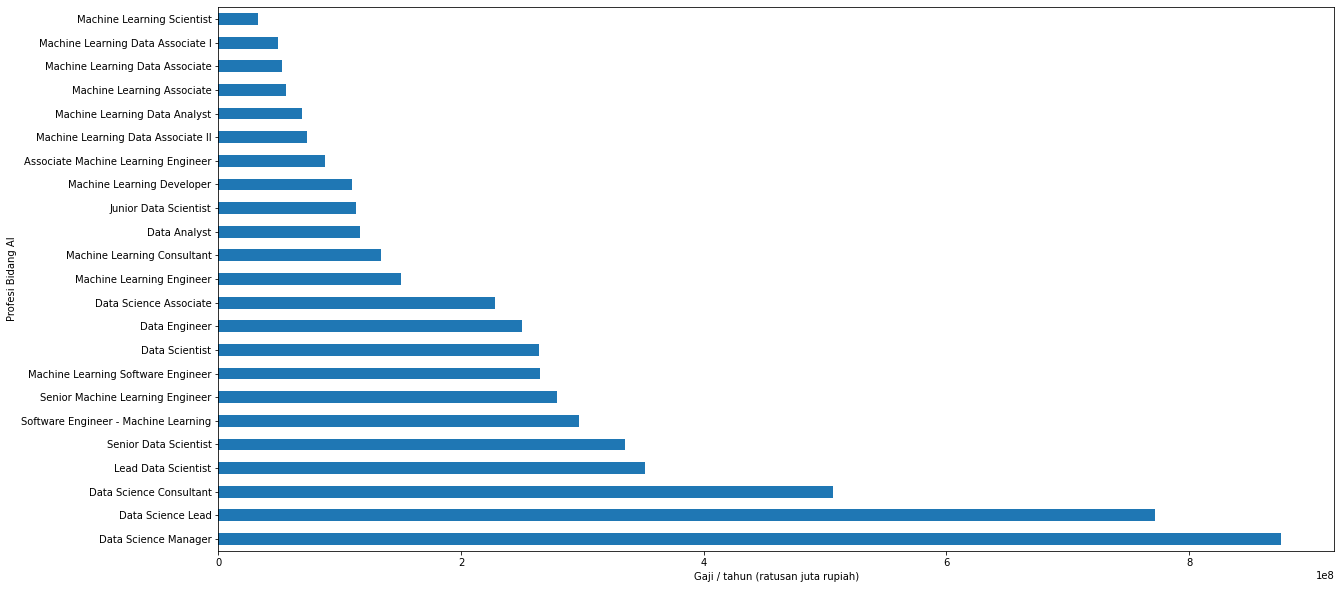

In [25]:
plt.figure(figsize=(20, 10))
data.groupby(['Job Title']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).plot(kind='barh')
plt.ylabel('Profesi Bidang AI')
plt.xlabel('Gaji / tahun (ratusan juta rupiah)')
plt.xticks(rotation='0')

***terlihat rata-rata gaji profesi Data Science lebih besar dari profesi lainnya***

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

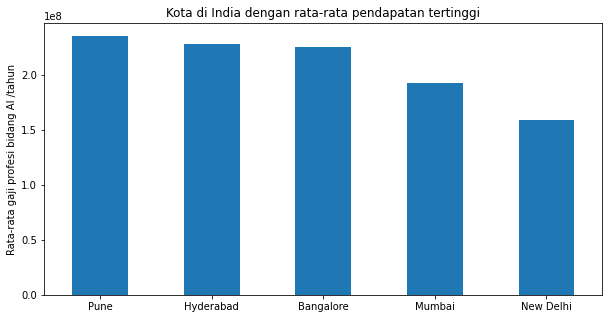

In [26]:
plt.figure(figsize=(10, 5))
data.groupby(['Location']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).plot(kind='bar')
plt.title('Kota di India dengan rata-rata pendapatan tertinggi')
plt.xlabel('')
plt.ylabel('Rata-rata gaji profesi bidang AI /tahun')
plt.xticks(rotation='0')

`pengelompokan kelas variabel profesi`

In [27]:
#1
DataScience =  data[data['Job Title'].isin(['Data Scientist', 'Data Science Associate','Data Science Consultant', 'Senior Data Scientist',
                                            'Junior Data Scientist', 'Lead Data Scientist','Data Science Manager', 'Data Science Lead'])]
DataScience['Bidang AI'] = 'Data Science'
#2
DataAnalysis = data[data['Job Title'].isin(['Data Analyst'])]
DataAnalysis['Bidang AI'] = 'Data Analysis'
#3
DataEngineer = data[data['Job Title'].isin(['Data Engineer'])]
DataEngineer['Bidang AI'] = 'Data Engineering'
#4
MachineLearning = data[data['Job Title'].isin(['Machine Learning Engineer','Machine Learning Software Engineer','Software Engineer - Machine Learning',
                                              'Machine Learning Engineer/Data Scientist','Machine Learning Consultant', 'Machine Learning Data Associate',
                                              'Machine Learning Data Associate I', 'Machine Learning Associate','Machine Learning Data Associate II',
                                              'Associate Machine Learning Engineer','Machine Learning Data Analyst','Senior Machine Learning Engineer',
                                              'Machine Learning Scientist','Machine Learning Developer'])]
MachineLearning['Bidang AI'] = 'Machine Learning'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [28]:
data = pd.concat([DataScience,DataAnalysis,DataEngineer,MachineLearning],axis = 0)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Gaji(Rp)_pertahun,Bidang AI
0,Mu Sigma,Data Scientist,105.0,Bangalore,122995384,Data Science
1,IBM,Data Scientist,95.0,Bangalore,226041398,Data Science
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,158704785,Data Science
3,Impact Analytics,Data Scientist,40.0,Bangalore,126978772,Data Science
4,Accenture,Data Scientist,32.0,Bangalore,179041020,Data Science


Text(0, 0.5, 'Rata-rata gaji profesi bidang AI /tahun')

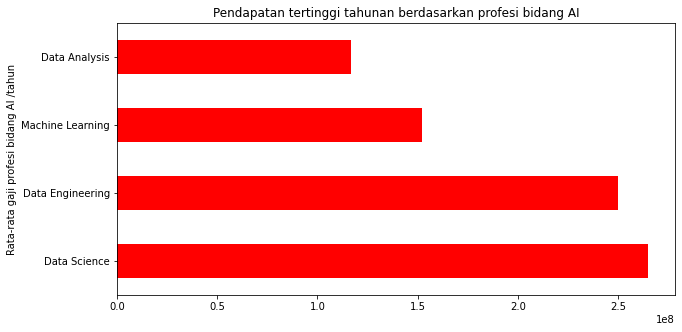

In [29]:
plt.figure(figsize=(10, 5))
data.groupby(['Bidang AI']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).plot(kind='barh',color='red')
plt.title('Pendapatan tertinggi tahunan berdasarkan profesi bidang AI')
plt.xlabel('')
plt.ylabel('Rata-rata gaji profesi bidang AI /tahun')

Text(0.5, 0, '')

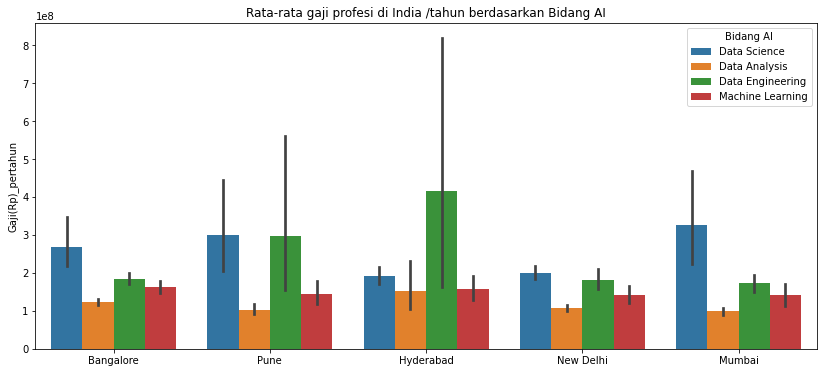

In [30]:
plt.figure(figsize=(14, 6))
sns.barplot(y="Gaji(Rp)_pertahun", x="Location", data=data,estimator=np.mean, hue="Bidang AI")
plt.title('Rata-rata gaji profesi di India /tahun berdasarkan Bidang AI')
plt.xlabel('')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


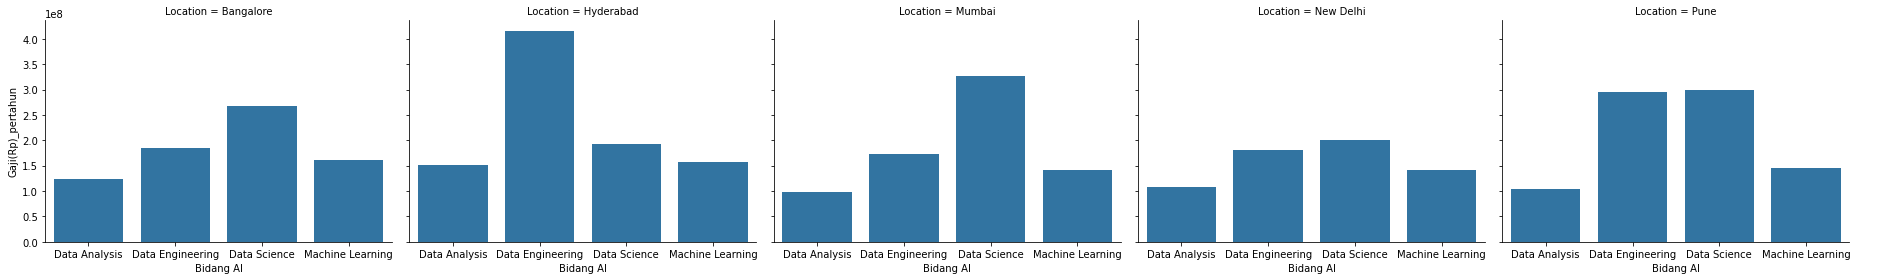

In [31]:
df = data.groupby(['Bidang AI','Location']).mean()['Gaji(Rp)_pertahun'].reset_index()

gridplot = sns.FacetGrid(data=df, col='Location', col_wrap=5,height = 4, aspect  =1.3)
gridplot.map(sns.barplot, 'Bidang AI', 'Gaji(Rp)_pertahun')
gridplot.add_legend(loc='center right')

***terlihat Data Science dan Data Engineering mengungguli Bidang AI lainnya pada beberapa perusahaan AI di India***

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


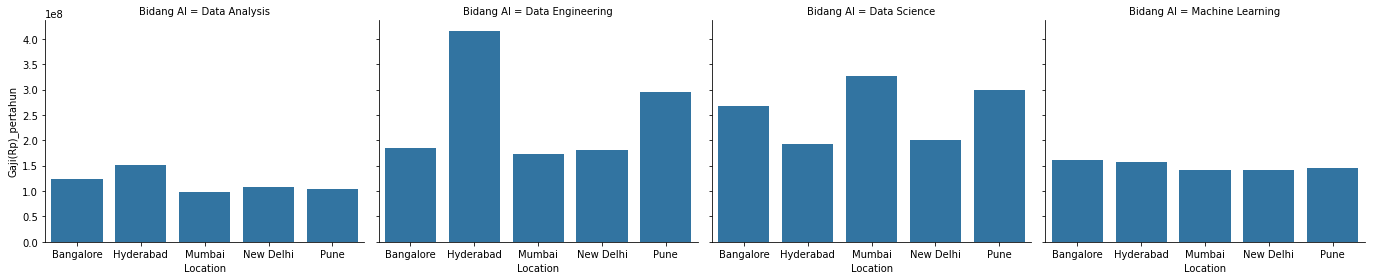

In [32]:
df = data.groupby(['Bidang AI','Location']).mean()['Gaji(Rp)_pertahun'].reset_index()

gridplot = sns.FacetGrid(data=df, col='Bidang AI', col_wrap=4,height = 4, aspect  =1.2)
gridplot.map(sns.barplot, 'Location', 'Gaji(Rp)_pertahun')
gridplot.add_legend(loc='center right')

Text(0.5, 1.0, '10 Perusahaan di India dengan rata-rata pendapatan tertinggi bidang AI')

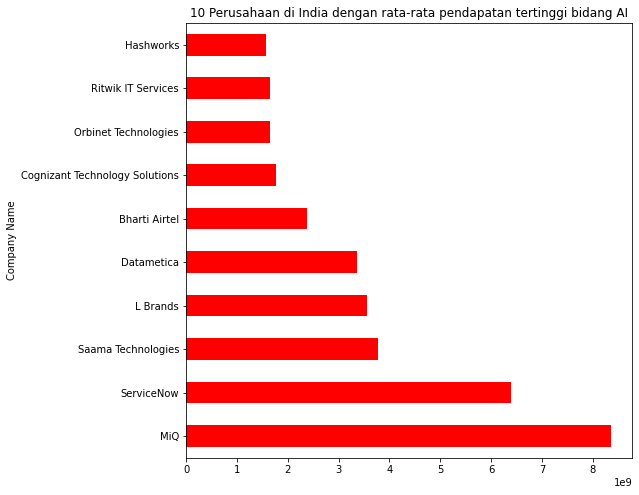

In [33]:
plt.figure(figsize=(8, 8))
data.groupby(['Company Name']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).head(10).plot(kind='barh',color='red')
plt.title('10 Perusahaan di India dengan rata-rata pendapatan tertinggi bidang AI')

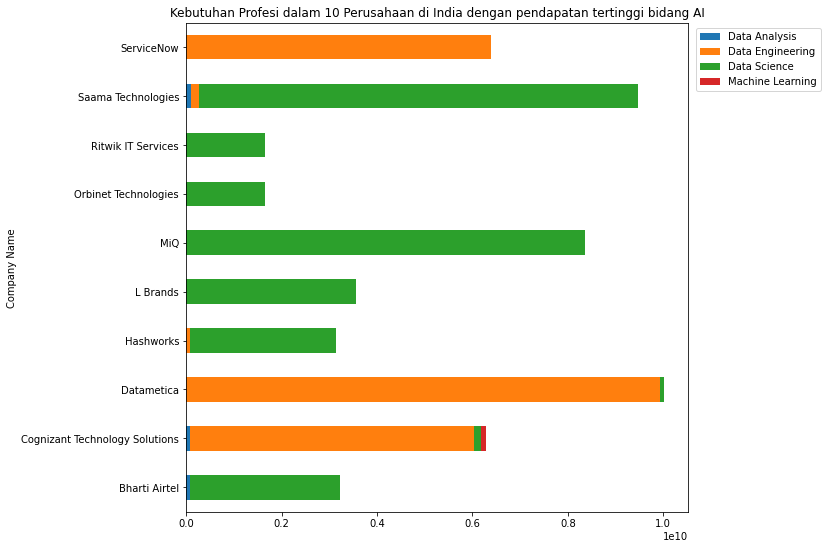

In [34]:
dataviz1 = data.groupby(['Company Name']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).head(10).reset_index()
columns = dataviz1['Company Name'].unique()

dataviz2 = data.groupby(['Bidang AI','Company Name']).mean()['Gaji(Rp)_pertahun'].reset_index()
dataviz2 =  dataviz2[dataviz2['Company Name'].isin(columns)]
dataviz2 = dataviz2.pivot_table(index="Company Name", columns="Bidang AI", values="Gaji(Rp)_pertahun",fill_value=0)

dataviz2.plot(kind='barh', stacked=True,figsize=(9, 9))
plt.title('Kebutuhan Profesi dalam 10 Perusahaan di India dengan pendapatan tertinggi bidang AI')
plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))

***terlihat Data Science dan Data Engineering paling dibutuhkan perusahaan AI di India***

In [35]:
#rata-rata gaji Bidang AI berdasarkan 5 kota di India

df = data.groupby(['Location','Bidang AI']).mean()['Gaji(Rp)_pertahun'].reset_index()
df.groupby('Bidang AI').mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).reset_index()

,Bidang AI,Gaji(Rp)_pertahun
0,Data Science,2.570810e+08
1,Data Engineering,2.501398e+08
2,Machine Learning,1.496333e+08
3,Data Analysis,1.169457e+08


#Data Preprocessing

In [36]:
X = data.drop(['Company Name','Job Title','Salaries Reported'],axis=1)
y = data['Gaji(Rp)_pertahun']

#labelencoding
X = pd.get_dummies(X)

In [37]:
from sklearn.model_selection import train_test_split

#std
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

#Model Machine Learning

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [39]:
model_regresi = [LinearRegression(), Lasso(alpha=1e-3), Ridge(alpha=1.0), ElasticNet(alpha=1e-3),RandomForestRegressor(), DecisionTreeRegressor()]

for m in model_regresi:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    #check overfitting
    print('reg score R2 test :',format(m.score(X_test,y_test)))
    print('reg score R2 train :',format(m.score(X_train,y_train)))
    
    #check error
    print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))
    
    print('-'*20, '\n')

model: LinearRegression()
reg score R2 test : 1.0
reg score R2 train : 1.0
Multiple Linear MAE 4.580451144097221e-08
-------------------- 

model: Lasso(alpha=0.001)
reg score R2 test : 1.0
reg score R2 train : 1.0
Multiple Linear MAE 0.0
-------------------- 

model: Ridge()
reg score R2 test : 1.0
reg score R2 train : 1.0
Multiple Linear MAE 9.70317236793023e-08
-------------------- 

model: ElasticNet(alpha=0.001)
reg score R2 test : 1.0
reg score R2 train : 1.0
Multiple Linear MAE 0.0
-------------------- 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.25518e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


model: RandomForestRegressor()
reg score R2 test : 0.8550570940616873
reg score R2 train : 0.9870403595264776
Multiple Linear MAE 14807008.838256529
-------------------- 

model: DecisionTreeRegressor()
reg score R2 test : 0.8656912684449365
reg score R2 train : 1.0
Multiple Linear MAE 16118810.039170507
-------------------- 



terlihat bahwa model Lasso dan ElasticNet memberikan akurasi tinggi dengan no overfitting

`selanjutnya akan dicheck model dan koef regresinya`

In [40]:
from sklearn.linear_model import LassoCV

# Lasso dengan cross-validation
modellasso = LassoCV(alphas = None, cv=5, random_state=0, max_iter=10000, normalize = True)

# Fit model
modellasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=5, max_iter=10000, normalize=True, random_state=0)

In [41]:
lasso_best = Lasso(alpha=modellasso.alpha_)
print(lasso_best.fit(X_train, y_train))
print(list(zip(lasso_best.coef_, X)))

Lasso(alpha=12222.630404787331)
[(0.999999999999973, 'Gaji(Rp)_pertahun'), (-0.0, 'Location_Bangalore'), (0.0, 'Location_Hyderabad'), (-0.0, 'Location_Mumbai'), (-0.0, 'Location_New Delhi'), (0.0, 'Location_Pune'), (-0.0, 'Bidang AI_Data Analysis'), (0.0, 'Bidang AI_Data Engineering'), (0.0, 'Bidang AI_Data Science'), (-0.0, 'Bidang AI_Machine Learning')]


In [42]:
from sklearn.linear_model import ElasticNetCV

# Elastic Net dengan cross-validation
modelELN = ElasticNetCV(alphas = None, cv=5, random_state=0, max_iter=10000, normalize = True)

# Fit model
modelELN.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


ElasticNetCV(cv=5, max_iter=10000, normalize=True, random_state=0)

In [43]:
eln_best = ElasticNet(alpha=modelELN.alpha_)
print(eln_best.fit(X_train, y_train))
print(list(zip(eln_best.coef_, X)))

ElasticNet(alpha=24445.260809574665)
[(0.9999999999999459, 'Gaji(Rp)_pertahun'), (-0.0, 'Location_Bangalore'), (0.0, 'Location_Hyderabad'), (-0.0, 'Location_Mumbai'), (-0.0, 'Location_New Delhi'), (0.0, 'Location_Pune'), (-0.0, 'Bidang AI_Data Analysis'), (0.0, 'Bidang AI_Data Engineering'), (0.0, 'Bidang AI_Data Science'), (-0.0, 'Bidang AI_Machine Learning')]


*Semakin besar nilai alpha, semakin agresif hukumannya.* 

`maka model tidak sesuai dengan tipe data X akan dilakukan model ensembling`

In [44]:
!pip3 install catboost

In [45]:
from xgboost import XGBRegressor
from sklearn.ensemble  import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [46]:
model_ensemble = [RandomForestRegressor(), DecisionTreeRegressor(), XGBRegressor(), GradientBoostingRegressor(), 
                 GaussianProcessRegressor(), CatBoostRegressor(), LGBMRegressor()]

for m in model_ensemble:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    #check overfitting
    print('reg score R2 test :',format(m.score(X_test,y_test)))
    print('reg score R2 train :',format(m.score(X_train,y_train)))
    
    #check error
    print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))
    
    print('-'*20, '\n')

model: RandomForestRegressor()
reg score R2 test : 0.8602033515898444
reg score R2 train : 0.984490478928676
Multiple Linear MAE 14082133.43866359
-------------------- 

model: DecisionTreeRegressor()
reg score R2 test : 0.8552860768603827
reg score R2 train : 1.0
Multiple Linear MAE 19013556.51920123
-------------------- 

[02:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model: XGBRegressor()
reg score R2 test : 0.9435484820442901
reg score R2 train : 0.9999629369263073
Multiple Linear MAE 12791167.431643626
-------------------- 

model: GradientBoostingRegressor()
reg score R2 test : 0.918684345300337
reg score R2 train : 0.9999840899263969
Multiple Linear MAE 12022788.175447863
-------------------- 

model: GaussianProcessRegressor()
reg score R2 test : -0.03371586213294542
reg score R2 train : 1.0
Multiple Linear MAE 194603890.94418126
-------------------- 

Learning rate set to 0.048798
0:	learn: 6583918

# Kesimpulan

`XGB terlihat meminimumkan overfitting namun memiliki tingkat kesalahan prediksi yang cukup tinggi`

In [57]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

#check overfitting
print('reg score R2 test :',format(xgb.score(X_test,y_test)))
print('reg score R2 train :',format(xgb.score(X_train,y_train)))
    
#check error
print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))

[02:28:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg score R2 test : 0.9435484820442901
reg score R2 train : 0.9999629369263073
Multiple Linear MAE 12791167.431643626
